In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

from tqdm import tqdm_notebook            # pip install tqdm
from libs import stock_daum, stock_naver  # local libraries

In [5]:
import time
for i in tqdm_notebook(range(10)):
    time.sleep(0.1)
    pass

## KOSPI 200 크롤링하기

In [6]:
df_list = []
for page_df in tqdm_notebook(stock_naver.get_kospi200('KPI200', 600)):
    df_list.append(page_df)

kpi200_df = pd.concat(df_list)
print(kpi200_df.shape)
kpi200_df.head()


(3541, 5)


,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2020-04-29,258.15,1.76,+0.69%,182395.0,6516368.0
2020-04-28,256.39,1.55,+0.61%,172425.0,6016788.0
2020-04-27,254.84,4.56,+1.82%,151357.0,5410331.0
2020-04-24,250.28,3.46,-1.36%,154306.0,5580465.0
2020-04-23,253.74,1.86,+0.74%,163807.0,6790106.0


## S&P 500 크롤링하기

+ http://finance.daum.net/global/quotes/US.

In [7]:
df_list = []
for page_df in tqdm_notebook(stock_daum.get_us_sp500()):
    df_list.append(page_df)

us_sp500_df = pd.concat(df_list)
print(us_sp500_df.shape)
us_sp500_df.head()


(3855, 15)


,symbolCode,tradePrice,tradeTime,change,changePrice,changeRate,prevClosingPrice,exchangeCountry,openingPrice,highPrice,lowPrice,accTradePrice,accTradeVolume,periodTradePrice,periodTradeVolume
date,,,,,,,,,,,,,,,
2020-04-28,US.SP500,2863.39,16:02:02,FALL,15.09,-0.005242,2878.48,USA,2909.96,2921.15,2860.71,0,3117664258,0,3117664258
2020-04-27,US.SP500,2878.48,16:02:04,RISE,41.74,0.014714,2836.74,USA,2854.65,2887.72,2852.89,0,2701578760,0,2701578760
2020-04-24,US.SP500,2836.74,16:02:02,RISE,38.94,0.013918,2797.80,USA,2812.64,2842.71,2791.76,0,2747807846,0,2747807846
2020-04-23,US.SP500,2797.80,16:02:04,FALL,1.51,-0.000539,2799.31,USA,2810.42,2844.90,2794.26,0,2844875076,0,2844875076
2020-04-22,US.SP500,2799.31,16:02:04,RISE,62.75,0.022930,2736.56,USA,2787.89,2815.10,2775.95,0,2696747954,0,2696747954


## 한 Axes에 그리기

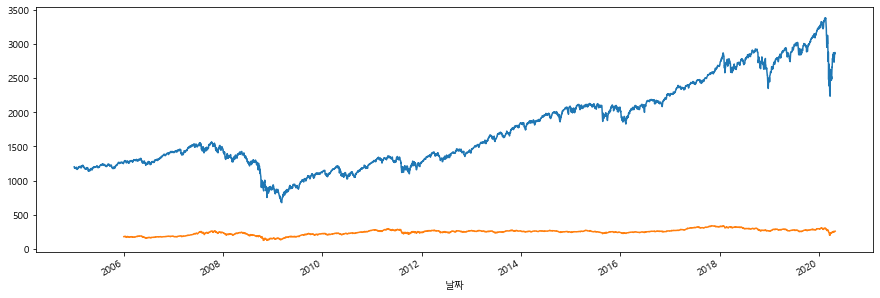

In [8]:
# 한 AX에 그리기
ax = us_sp500_df['tradePrice'].plot(figsize=(15, 5))
kpi200_df['체결가'].plot(figsize=(15, 5), ax=ax)

In [9]:
df = pd.DataFrame({
    'kpi200': kpi200_df['체결가'],
    'us_sp500': us_sp500_df['tradePrice'],
})
print(df.shape)
df.head()

(3963, 2)


,kpi200,us_sp500
2005-01-03,NaN,1202.08
2005-01-04,NaN,1188.05
2005-01-05,NaN,1183.74
2005-01-06,NaN,1187.89
2005-01-07,NaN,1186.19


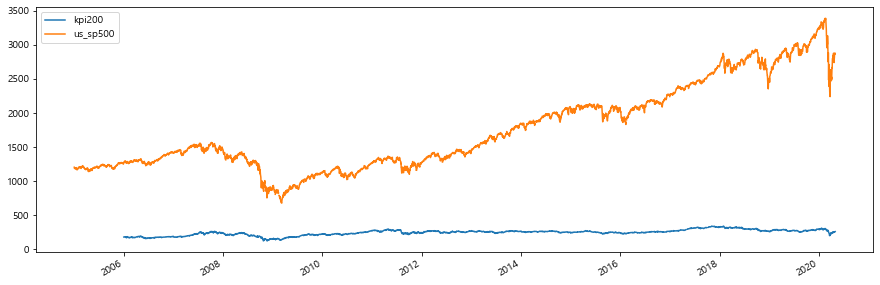

In [10]:
df.plot(figsize=(15, 5))

## 단위가 다른 2개 차트를 Ratio로 표현하여 맞추기

In [15]:
시작가 = kpi200_df['체결가'][0]
kpi200_ratio_series = 100 * kpi200_df['체결가'] / 시작가

In [16]:
시작가 = us_sp500_df['tradePrice'][0]
us_sp500_ratio_series = 100 * us_sp500_df['tradePrice'] / 시작가

In [17]:
df = pd.DataFrame({
    'kpi200': kpi200_ratio_series,
    'us_sp500': us_sp500_ratio_series,
})
print(df.shape)
df.head()

(3963, 2)


,kpi200,us_sp500
2005-01-03,NaN,100.000000
2005-01-04,NaN,98.832856
2005-01-05,NaN,98.474311
2005-01-06,NaN,98.819546
2005-01-07,NaN,98.678125


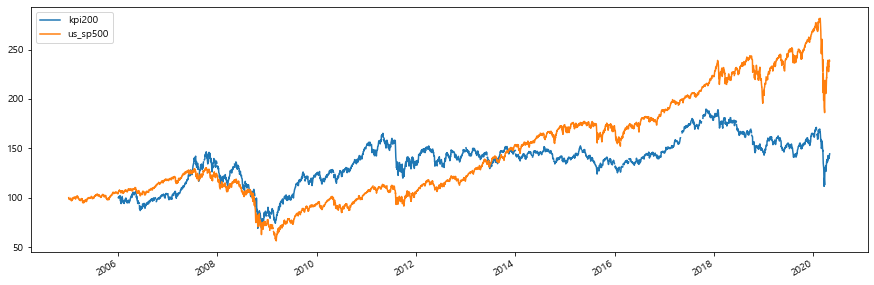

In [18]:
df.plot(figsize=(15, 5))